In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/diabetes.csv")

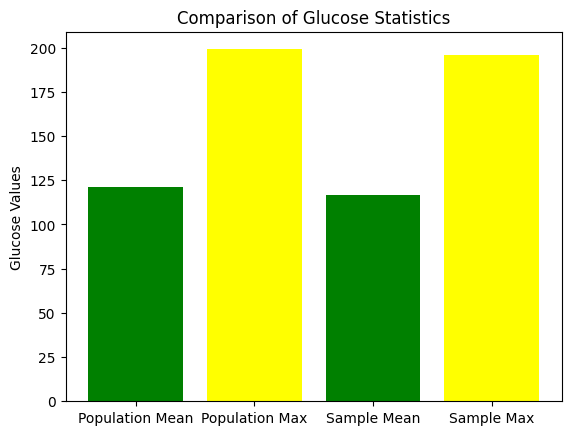

In [4]:

np.random.seed(249)


sample = data.sample(25)

population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()


# Create a bar chart for comparison
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]

plt.bar(labels, values, color=['green', 'yellow', 'green', 'yellow'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()


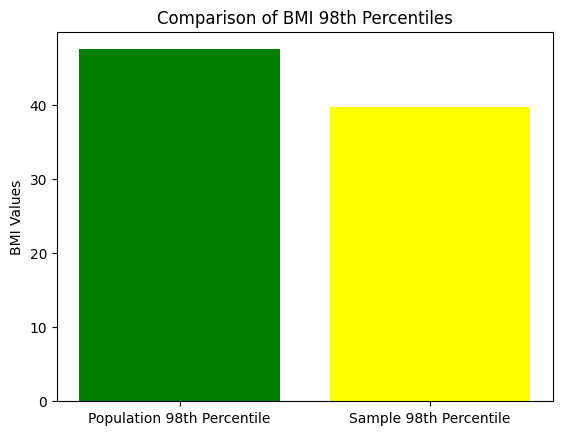

In [5]:
population_percentile = np.percentile(data['BMI'], 98)
sample_percentile = np.percentile(sample['BMI'], 98)

labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile, sample_percentile]

plt.bar(labels, values, color=['green', 'yellow'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [7]:

bootstrap_samples = 500
sample_size = 150


bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)


for i in range(bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)


population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)


bmean=np.mean(bootstrap_means)
bsd=np.mean(bootstrap_std_devs)
bp=np.mean(bootstrap_percentiles)


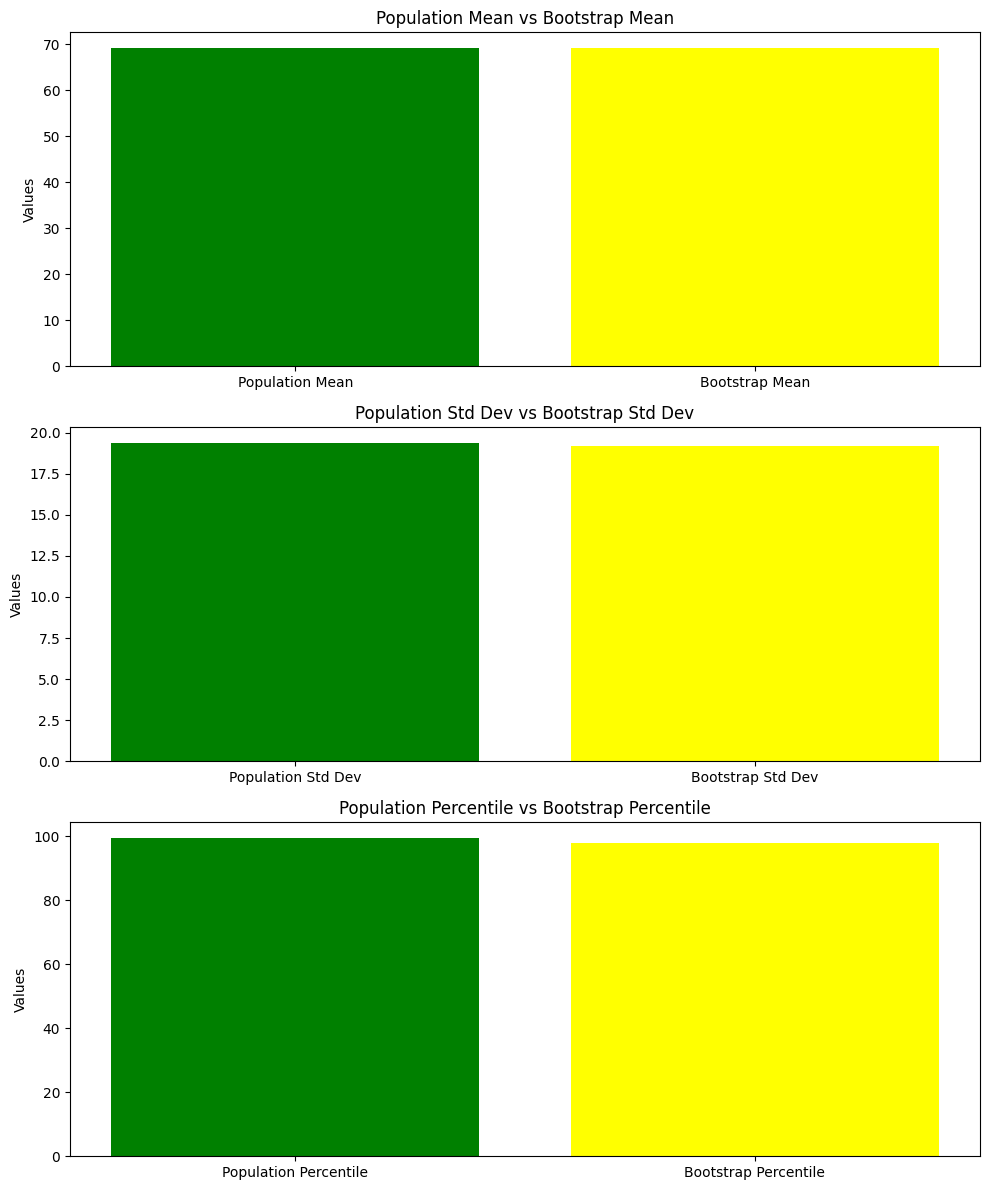

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['green', 'yellow'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bsd], color=['green', 'yellow'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['green', 'yellow'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()